# Crash Course Lession 2

In this lesson we will learn about:

* The **dot product** of two vectors.
* The **length** of a vector.
* The **angle** between two vectors.
* What it means for two vectors to be **orthogonal**.
* How to **orthogonally project** one vector onto the span of another vector. 
* The **orthogonal complement** of a subspace.
* The **Gram-Schmidt** process for finding an orthonormal basis of a subspace.
* How to **orthogonally project** one vector onto the span of a list of vectors.

Note that there are **Exercises** intersperced throughout this notebook.  Please attempt these exercises as you encounter them.  Solutions to the exercises are provided at the end of the notebook.

In [14]:
import numpy as np

**Definition**:  The **dot product** of two vectors is defined by 

$$
\begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix} \cdot \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix} = v_1w_1 + v_2w_2 +v_3w_3 + \dots + v_nw_n
$$

**Example**:  

$$
\begin{align*}
\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix} \cdot
\begin{bmatrix}
3 \\ 0 \\ 2
\end{bmatrix} & = 1(3) + 2(0) + 3(2)\\
&= 3+0+6\\
&= 9
\end{align*}
$$

We can use numpy to compute dot products as follows:

In [15]:
v = np.array([1,2,3])
w = np.array([3,0,2])
vdotw = np.dot(v,w)
print('The dot product of ', v, ' and ', w, ' is ', vdotw)

The dot product of  [1 2 3]  and  [3 0 2]  is  9


Dot products may not look like much, but they have an amazing array of both algebraic and geometric properties:

* We can do "normal algebra" with dot products:
    * The distributive law $\vec{a} \cdot (\vec{b} + \vec{c}) = \vec{a} \cdot \vec{b} + \vec{a} \cdot \vec{c}$
    * The commutative law $\vec{a} \cdot \vec{b} = \vec{b} \cdot \vec{a}$ holds.
    * The zero vector works as you would expect $\vec{a} \cdot \vec{0} = 0$.
* $\vec{v} \cdot \vec{v}$ is the square of the **length** of the vector $\vec{v}$.  Writing $|\vec{v}|$ for the length, we can write $\vec{v} \cdot \vec{v} = |\vec{v}|^2$
    * Note:  This is basically just a restatement of the Pythagorean theorem. For example, if $\vec{v} = \begin{bmatrix} a \\ b \end{bmatrix}$, then $\vec{v} \cdot \vec{v} = a^2 +b^2$ which is the square of the length of the vector by the Pythagorean Theorem.
* $\vec{v} \cdot \vec{w} = |\vec{v}||\vec{w}| \cos(\theta)$ where $\theta$ is the **angle** between the two vectors.
    * In particular, if two vectors are perpendicular (aka **orthogonal**) then the angle between them is $90^\circ$ and  $\cos(90^\circ) = 0$.  So two vectors are orthogonal if their dot product is $0$.

It pains me to skip the beautiful development of these formulas, but this is a crash course!  I recommend checking out the answers to [this question](https://math.stackexchange.com/questions/348717/dot-product-intuition) for some great intuition about how to link the algebra to the geometry here.

**Note**:  We can use the notation $\vec{v} \cdot \vec{w}$ interchangeably with $\langle \vec{v}, \vec{w} \rangle$.  The latter notation is sometimes more readable.

**Exercise 1**

$$
\vec{a} = \begin{bmatrix} 
4 \\ -1 \\ 2 
\end{bmatrix}

\hphantom{dsd}

\vec{b} = \begin{bmatrix} 
3 \\ 2 \\ 1 
\end{bmatrix}

\hphantom{dsd}

\vec{c} = \begin{bmatrix} 
1 \\ 1 \\ -5 
\end{bmatrix}

$$

* Find the length of each vector both by hand and using numpy functions (hint: np.linalg.norm(v) gives the length of a vector v).
* Determine which pair of these vectors are orthogonal both by hand and using numpy functions.  
* Find the angle between $\vec{a}$ and $\vec{b}$ both by hand and using numpy functions.

**Exercise 2**

Let $\vec{x}$ and $\vec{y}$ be any two vectors.  Expand out $$|\vec{x} + \vec{y}|^2 = (\vec{x}+ \vec{y})\cdot(\vec{x}+\vec{y})$$ using the algebraic properties of the dot product.

Our main use for dot products will be orthogonally projecting a vector into a subspace.  We will start with the easiest such situation:  orthogonally projecting a vector onto the subspace spanned by another vector.

<p align = 'middle'>
<img src="crash_course_assets/proj.png" width="400">
</p>

Here we have two vectors $\vec{v}$ and $\vec{w}$.  The span of $\vec{v}$ is a line through the origin.  We want to **orthogonally project** $\vec{w}$ onto this line.  That means we are trying to find the vector $\vec{p} = \textrm{proj}_{\vec{v}}(\vec{w})$ which is in the span of $\vec{v}$ and for which $\vec{w} - \vec{p}$ is perpendicular to $\vec{v}$.  This projection is the vector in $\textrm{span}(\vec{v})$ which is closest to the vector $\vec{w}$.

We can figure out a formula for $\textrm{proj}_{\vec{v}}(\vec{w})$ by using the dot product properties.

Since $\textrm{proj}_{\vec{v}}(\vec{w})$ is in the span of $\vec{v}$ we know there is a real number $\alpha$ with 

$$
\textrm{proj}_{\vec{v}}(\vec{w}) = \alpha \vec{v}
$$

We also know also know that 

$$
\left(\vec{w} - \textrm{proj}_{\vec{v}}(\vec{w}) \right) \cdot \vec{v} = 0
$$

Putting these two facots together we have

$$
\begin{align*}
&\left(\vec{w} - \alpha \vec{v} \right) \cdot \vec{v} = 0\\
& \vec{v}\cdot \vec{w} - \alpha \vec{v} \cdot \vec{v} = 0\\
& \alpha = \frac{\vec{v} \cdot \vec{w}}{\vec{v} \cdot \vec{w}}
\end{align*}
$$

So we have

$$
\textrm{proj}_{\vec{v}}(\vec{w}) = \frac{\vec{v} \cdot \vec{w}}{\vec{v} \cdot \vec{v}} \vec{v}
$$

Note:  this formula only makes sense if $\vec{v} \neq \vec{0}$.  If that were the case, then we should define the projection to just be the zero vector.

Note:  this formula also gives us an intuitive way to understand the dot product.  If $\vec{v}$ is of unit length, the formula says $\vec{v} \cdot \vec{w}$ is the amount you need to scale $\vec{v}$ to get the projection of $\vec{w}$ onto the span of $\vec{v}$.

**Exercise 3**:  Implement a python function which takes two numpy vectors and returns the orthogonal projection of second vector onto the span of the first vector. 

In [16]:
#Uncomment and complete the code!

##Note:  we are assuming that v and w have the same shape here.

#def proj(v,w):
#    if np.linalg.norm(v) == 0:
#        return # what should be returned here?
#    if np.linalg.norm(v) != 0:
#        # define p as the orthogonal projection of w onto the span of the vector non-zero vector v here.
#        return p

#Check youself
#v = np.array([1,-1])
#w = np.array([3,2])
#print('These two should be equal:', proj(v,w), '=',  np.array([0.5,-0.5]))



**Definition**:  The **orthogonal complement** $S^\perp$ (read "S perp") of a subspace $S$ is the collection of all vectors which are orthogonal to every vector in $S$:

$$
S^\perp = \{ \vec{v} \in \mathbb{R}^n : \vec{v} \cdot \vec{w} = 0  \textrm{ for all $\vec{w} \in S$}\}
$$

Examples:

* The orthogonal complement of $\{\vec{0}\}$ is all of $\mathbb{R}^n$.
* $S = \textrm{span}\left( \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}\right)$ is the $x$-axis.  Then $S^\perp$ would be the collection of all vectors perpendicular to the $x$-axis, which is the $yz$ plane.  In other words, $$S^\perp = \textrm{span}\left( \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}\right)$$.
* $S = \textrm{span}\left( \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}\right)$ is a plane in $\mathbb{R}^3$.  If a vector $\begin{bmatrix} x \\ y \\ z\end{bmatrix} \in S^\perp$ then:

$$
\begin{align*}
&\begin{cases}
\begin{bmatrix} x \\ y \\ z\end{bmatrix} \cdot \begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} = 0\\
\begin{bmatrix} x \\ y \\ z\end{bmatrix} \cdot \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix} = 0\\
\end{cases}\\
&\begin{cases}
x = 0\\
x+ y + z = 0\\
\end{cases}\\
&\begin{cases}
x = 0\\
z = -y \\
\end{cases}\\
\end{align*}
$$

so 

$$
S^\perp  = \left\{\begin{bmatrix} 0 \\ y \\ -y\end{bmatrix}: y \in \mathbb{R}\right\} = \textrm{span}\left(\begin{bmatrix} 0 \\ 1 \\ -1 \end{bmatrix}\right)
$$

In other words, the only vectors perpendicular to the plane spanned by $\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$ and  $\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$ are multiples of the vector $\begin{bmatrix} 0 \\ 1 \\ -1 \end{bmatrix}$.

**Theorem**:  If $S$ is any subspace of $\mathbb{R}^n$ and $\vec{v}$ is any vector in $\mathbb{R}^n$, then $\vec{v}$ can be uniquely decomposed into the sum of two vectors $\textrm{proj}_S(\vec{v}) \in S$ and $\vec{r} \in S^\perp$.  $\textrm{proj}_S(\vec{v})$ is the vector in $S$ which is closest to $\vec{v}$ among all of the vectors in $S$.  The difference between $\vec{v}$ and $\textrm{proj}_S(\vec{v})$ is $\vec{r}$.

Note:  I am using $\vec{r}$ to stand for "residual" in anticipation of applying this to fitting linear regression.

The rest of this notebook will be leading up to one method (not the most efficient method!) for finding $\textrm{proj}_S(\vec{v})$ when $S$ is the span of a list of vectors.

**Definition**:  an **orthonormal basis** of a subspace $S$ is a basis where each vector has length $1$ and where the basis vectors are pairwise orthogonal to each other.

Observation:  if we can find an orthonormal basis for a subspace $S$, then the problem of projecting a vector orthogonally onto $S$ becomes easy.

Here is why:

Assume $\vec{e}_1, \vec{e}_2, \vec{e}_3, ... \vec{e}_k$ is an orthonormal basis of $S$ and $\vec{v}$ is a vector we want to project orthogonally onto $S$.

By the theorem we know that

$$\vec{v} =  \textrm{proj}_S(\vec{v}) + \vec{r} \textrm{ where $\vec{r} \in S^\perp$}$$ 

Since $\vec{e}_1, \vec{e}_2, \vec{e}_3, ... \vec{e}_k$ is a basis for $S$ and $\textrm{proj}_S(\vec{v}) \in S $ we can write

$$
\textrm{proj}_S(\vec{v}) = c_1\vec{e}_1+  c_2\vec{e}_2+ c_3\vec{e}_3+  ... +c_k \vec{e}_k 
$$

Now we have 

$$\vec{v} =  c_1\vec{e}_1+  c_2\vec{e}_2+ c_3\vec{e}_3+  ... +c_k \vec{e}_k  + \vec{r}$$

If we can determine the value of each $c_j$ we are done.  This is easy to do if we dot each side of the equation with $\vec{e}_j$.  Note that $\vec{e}_i \cdot \vec{e}_j = 0$ unless $i = j$ when $\vec{e}_j \cdot \vec{e}_j = 1$.  Also note that $\vec{r} \cdot \vec{e}_j = 0$ since $r \in S^\perp$.

$$
\begin{align*}
&\vec{e}_j \cdot \vec{v} = c_1\vec{e}_1 \cdot \vec{e}_j+  c_2\vec{e}_2 \cdot \vec{e}_j+ c_3\vec{e}_3 \cdot \vec{e}_j+ ... + c_j \vec{e}_j \cdot \vec{e}_j +   ... +c_k \vec{e}_k \cdot \vec{e}_j  + \vec{r} \cdot \vec{e}_j\\
& \vec{e}_j \cdot \vec{v}  = 0 + 0 + 0 + ... + c_j (1) + ... + 0 + 0\\
&c_j  =\vec{e_j} \cdot \vec{v}
\end{align*}
$$



So we find that if $\vec{e}_1, \vec{e}_2, \vec{e}_3, ... \vec{e}_k$ is an orthonormal basis of $S$ then we have the formula

$$
\textrm{proj}_S(\vec{v}) = \sum_{j=1}^{j=k} (\vec{v} \cdot \vec{e}_j)\vec{e_j}
$$



So we have reduced the problem of orthogonally projecting a vector into a subspace to the problem of finding an orthogonal basis for a subspace.

For that we will use the **Gram-Schmidt** process:

Let $S = \textrm{span}(\vec{v_1}, \vec{v_2}, ..., \vec{v_k})$ where the $\vec{v}_j$ are linearly independent.

Note:  if the $\vec{v}_j$ are not linearly independent, you could use the ideas in Lesson 1 to produce a new list with the same span which is linearly independent.

We will find an orthonormal basis $\vec{e}_j$ of $S$ as follows:

* $\vec{e}_1 = \vec{v}_1/|\vec{v}_1|$
* If we already have $\vec{e}_1, \vec{e_2}, ..., \vec{e}_{j-1}$ then we construct $\vec{e}_j$ as follows:
    * Project $\vec{v}_j$ orthogonally onto the span of $\vec{e}_1, \vec{e_2}, ..., \vec{e}_{j-1}$ using the formula obtained above:
       $$ \vec{p}_j = \sum_{i=1}^{j-1} (\vec{v}_j \cdot \vec{e}_i) \vec{e}_i $$
    * $\vec{r_j} = \vec{v}_j - \vec{p}_j$ will be orthogonal to all of the $\vec{e}_i$ generated so far.
    * Set $\vec{e}_j = \vec{r}_j/|\vec{r}_j|$.  This just scales $\vec{r}_j$ to be of length $1$.




**Exercise 4**: Implement the Gram-Schmidt process using NumPy functions.

In [17]:
# gram_schmidt(A) should take a numpy array of shape (n,k) as input.  For the purposes of this exercise, 
# we will assume that the columns of A are linearly independent.  The output should be a numpy array of shape (n,k) whose columns are 
# orthonormal and have the same span as the columns of A.

# Uncomment the code below and complete it!

#def gram_schmidt(A):
#    n = A.shape[0]
#    k = A.shape[1]
#    B = np.zeros((n,k))
#    B[:,0] = A[:,0]/np.linalg.norm(A[:,0])
#    for i in range(1,k):
#        # your code here
#    return B

#test
#A = np.array([[1, 1, 1 ],[-1, 0, 1],[1,1, 2]])
#e0 = gram_schmidt(A)[:,0]
#e1 = gram_schmidt(A)[:,1]
#e2 = gram_schmidt(A)[:,2]
#print('These should be 1: ', round(np.linalg.norm(e0),5), round(np.linalg.norm(e1),5), round(np.linalg.norm(e2),5))
#print('These should be 0: ', round(np.dot(e0, e1),5), round(np.dot(e0, e2),5), round(np.dot(e1, e2),5))

**Exercise 5**:  Implement orthogonal projection onto a subspace.

In [18]:

#orthoproj(A,v) takes an (n,k) numpy array A and a (k,) numpy array v as inputs.  
#Assuming the columns of A are linearly independent, it returns the orthogonal projection of v onto the span of the columns of A.T

#uncomment and finish the code below!

#def orthoproj(A,v):
    # your code here!

## test
#A = np.random.random((3,2))
#v = np.array(np.random.random(3))
#print(orthoproj(A,v), 'should be equal to', np.dot(A, np.dot(np.linalg.inv(np.dot(A.transpose(),A)),np.dot(A.transpose(),v)))  )

**Example**:  We can use orthogonal projection to create a primitive image compression algorithm.

[[0.48235294 0.48235294 0.48627451 ... 0.82352941 0.83529412 0.82745098]
 [0.4745098  0.48235294 0.48235294 ... 0.78823529 0.79215686 0.78431373]
 [0.46666667 0.46666667 0.4745098  ... 0.75686275 0.75294118 0.73333333]
 ...
 [0.57254902 0.56078431 0.55686275 ... 0.37647059 0.36862745 0.39215686]
 [0.57254902 0.57254902 0.55686275 ... 0.30980392 0.32941176 0.34509804]
 [0.5372549  0.56078431 0.56078431 ... 0.25098039 0.30588235 0.32156863]]


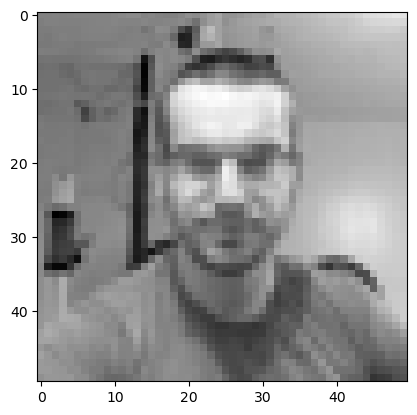

In [19]:
from PIL import Image
from numpy import asarray

# feel free to change this image to any other square image you like!  
img = Image.open('steve.jpg').convert('L').resize((50,50))

numpydata = asarray(img)/255 #this is a shape (50,50) numpy array with values between 0 and 1 (0 = black, 1 = white, intermediate = grey)

print(numpydata)

from matplotlib import pyplot as plt
plt.imshow(numpydata, cmap='gray')
plt.show()

Currently we need to record $50*50 = 2500$ floats to recreate this image.

We are going to think of this image as a vector in $\mathbb{R}^{2500}$.  We are going to make a movie showing projection of this vector onto higher and higher dimensional subspaces:  $0, 100, 200, ..., 2500$.  You can see that as the dimension of the subspace increases, the recreation of the original image improves.

In [20]:
from IPython.display import HTML
from IPython.display import display
import matplotlib.animation as animation
plt.ioff()

# I am defining a new projection operator which is a bit more efficiently coded.  
# You could use your orthoprog, where I use newproj, it will just be slow.
# This takes about 30 seconds to run on my computer.
def newproj(A,v):
    return np.dot(A, np.dot(np.linalg.inv(np.dot(A.transpose(),A)),np.dot(A.transpose(),v))) 

v = numpydata.reshape(-1,1) # v is now a (2500,1) vector.count

fig, ax = plt.subplots()

ims = []
for i in range(25):
    A = np.random.random((2500, i*100)) # an array whose columns are i*100 random vectors in 2500D space.count
    approx = newproj(A,v).reshape((50,50))
    im = ax.imshow(approx, animated = True, cmap='gray')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

#uncomment the line below if you want to save the animation as a gif.

#ani.save('animation.gif', writer='imagemagick') 

display(HTML(ani.to_jshtml()))


I think this is pretty cool!  We are approximating an image by recombining a certain number of "random noise" images with appropriate weights.

# Exercise Solutions

> **Exercise 1**
>
>$$
>\vec{a} = \begin{bmatrix} 
>4 \\ -1 \\ 2 
>\end{bmatrix}
>
>\hphantom{dsd}
>
>\vec{b} = \begin{bmatrix} 
>3 \\ 2 \\ 1 
>\end{bmatrix}
>
>\hphantom{dsd}
>
>\vec{c} = \begin{bmatrix} 
>1 \\ 1 \\ -5 
>\end{bmatrix}
>
>$$
>
>* Find the length of each vector both by hand and using numpy functions (hint: np.linalg.norm(v) gives the length of a vector v).


$$
\begin{align*}
&|\vec{a}| = \sqrt{4^2 + (-1)^2 + 2^2} = \sqrt{21} \approx 4.58\\
&|\vec{b}| = \sqrt{3^2 + 2^2 + 1^2} = \sqrt{14} \approx 3.74\\
&|\vec{c}| = \sqrt{1^2 + 1^2 + (-5)^2} = \sqrt{38} \approx 5.19
\end{align*}
$$

In [21]:
a = np.array([4,-1,2])
b= np.array([3,2,1])
c = np.array([1,1,-5])
np.linalg.norm(a), np.linalg.norm(b), np.linalg.norm(c)

(4.58257569495584, 3.7416573867739413, 5.196152422706632)

> * Determine which pair of these vectors are orthogonal both by hand and using numpy functions.

$$
\begin{align*}
&\vec{a} \cdot \vec{b} = 4(3)+(-1)(2) + 2(1) =  12 \neq 0\\
&\vec{a} \cdot \vec{c} = 4(1) + (-1)(1) + 2(-5) = -7 \neq 0\\
&\vec{b} \cdot \vec{c} = 3(1) + 2(1) + 1(-5) = 0 
\end{align*}
$$

Only $\vec{b}$ and $\vec{c}$ are orthogonal to each other.

In [22]:
np.dot(a,b), np.dot(a,c), np.dot(b,c)

(12, -7, 0)

> * Find the angle between $\vec{a}$ and $\vec{b}$ both by hand and using numpy functions

$$
\begin{align*}
&\vec{a} \cdot \vec{b} = |\vec{a}||\vec{b}| \cos(\theta)\\
&\theta = \cos^{-1}(\frac{\vec{a} \cdot \vec{b}}{|\vec{a}||\vec{b}|})\\
&\theta = \cos^{-1}(\frac{12}{\sqrt{21}\sqrt{14}})\\
&\theta \approx 0.7956 \textrm{ rad}
\end{align*}
$$

In [23]:
import math
math.acos(np.dot(a,b)/np.linalg.norm(a)/np.linalg.norm(b))

0.7956029534845352

> **Exercise 3**:  Implement a python function which takes two numpy vectors and returns the orthogonal projection of second vector onto the span of the first vector. 

In [24]:
def proj(v,w):
    if np.linalg.norm(v) == 0:
        return np.zeros(v.shape) # could just return v technically, but I am being extra safe.
    if np.linalg.norm(v) != 0:
        alpha = (np.dot(v,w))/(np.linalg.norm(v)**2) #formula for the coefficient of v.
        p =  alpha * v # formula for the projection.
        return p
    
# Check youself
v = np.array([1,-1])
w = np.array([3,2])
print('These two should be equal:', proj(v,w), '=',  np.array([0.5,-0.5]))

These two should be equal: [ 0.5 -0.5] = [ 0.5 -0.5]


> **Exercise 4**: Implement the Gram-Schmidt process using NumPy functions.

In [25]:
# gram_schmidt(A) should take a numpy array of shape (n,k) as input.  For the purposes of this exercise, 
# we will assume that the columns of A are linearly independent.  The output should be a numpy array of shape (n,k) whose columns are 
# orthonormal and have the same span as the columns of A.

import functools

def gram_schmidt(A):
    n = A.shape[0]
    k = A.shape[1]
    B = np.zeros((n,k))

    B[:,0] = A[:,0]/np.linalg.norm(A[:,0])  # The 0th column of B is the normalized 0th column of A.

    for i in range(1,k):
        v = A[:,i] # This is the ith column of A.

        dots = [np.dot(v, B[:,j])*B[:,j] for j in range(i)] 
            # dots is an array of vectors.
            # each vector is obtained by dotting v with each of the e_j for j=0,...,i-1 and scaling e_j by that quantity.

        p = functools.reduce(lambda a,b: a+b, dots) 
            # creates a running total of the vectors from dots and returns the final sum.
            # Note 1: p could have also been implemented using a for loop or two, but I find the use of reduce to be cleaner and more comprehensible.
            # Note 2: p could have been defined directly as np.dot(B, np.dot(B.transpose(), v)).  We have not introduced matrix multiplication or the transpose
            # of a matrix yet in this crash course, so I implemented it in a way which is (hopefully!) comprehensible at this stage.

        r = v - p 
        e = r/np.linalg.norm(r)
        B[:,i] = e
    return B

# test
A = np.array([[1, 1, 1 ],[-1, 0, 1],[1,1, 2]])
e0 = gram_schmidt(A)[:,0]
e1 = gram_schmidt(A)[:,1]
e2 = gram_schmidt(A)[:,2]
print('These should be 1: ', round(np.linalg.norm(e0),5), round(np.linalg.norm(e1),5), round(np.linalg.norm(e2),5))
print('These should be 0: ', round(np.dot(e0, e1),5), round(np.dot(e0, e2),5), round(np.dot(e1, e2),5))


These should be 1:  1.0 1.0 1.0
These should be 0:  -0.0 0.0 0.0


In [26]:
#orthoproj(A,v) takes an (n,k) numpy array A and a (k,) numpy array v as inputs.  
#Assuming the columns of A are linearly independent, it returns the orthogonal projection of v onto the span of the columns of A.T

def orthoproj(A,v):
    
    B = gram_schmidt(A) 
        # The columns of B are an orthonormal basis with the same span as the columns of A.

    dots = [np.dot(B[:,j],v)*B[:,j] for j in range(A.shape[1])]
        # dots is an array of vectors.  
        # Each vector is obtained by dotting a column of B with v, then scaling that column of B
        # by the resulting number.

    p = functools.reduce(lambda a,b: a+b, dots)
        # creates a running total of the vectors from dots  and returns the final sum.
        # Note 1: p could have also been implemented using a for loop or two, but I find the use of reduce to be cleaner and more comprehensible.
        # Note 2: p could have been defined directly as np.dot(B, np.dot(B.transpose(), v)).  We have not introduced matrix multiplication or the transpose
        # of a matrix yet in this crash course, so I implemented it in a way which is (hopefully!) comprehensible at this stage.
        
    return p

# test
A = np.random.random((3,2))
v = np.array(np.random.random(3))
print(orthoproj(A,v), 'should be equal to', np.dot(A, np.dot(np.linalg.inv(np.dot(A.transpose(),A)),np.dot(A.transpose(),v)))  )

[0.25624697 0.35805965 0.89622429] should be equal to [0.25624697 0.35805965 0.89622429]
